In [1]:
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.datasets import fashion_mnist
from sklearn.preprocessing import StandardScaler
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
warnings.filterwarnings("ignore")

# Load data

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(60000,-1)
X_test = X_test.reshape(10000,-1)

In [3]:
seed = 1234
np.random.seed(seed)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2,random_state=seed,shuffle=True)

In [4]:
X_tr.shape

(48000, 784)

In [5]:
X_val.shape

(12000, 784)

In [6]:
scaler = StandardScaler()
scaler.fit(X_tr)
X_tr = scaler.transform(X_tr)
X_val = scaler.transform(X_val)

# Build model and plot results

Logistic Regression (C=0.001)
Logistic Regression (C=0.01)
Logistic Regression (C=0.1)
Logistic Regression (C=1)
Logistic Regression (C=10)
Logistic Regression (C=100)
[0.8522083333333333, 0.8551875, 0.8555625, 0.8555, 0.8555208333333333, 0.8555833333333334]
[0.8371666666666666, 0.8405, 0.84025, 0.8398333333333333, 0.8401666666666666, 0.84025]


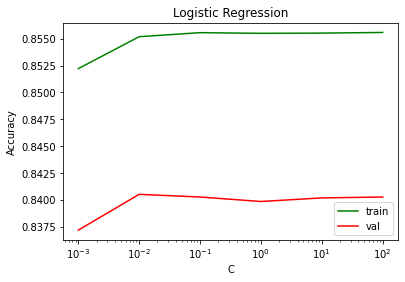

In [11]:
train_acc = []
test_acc = []
for c in [1e-3,1e-2,1e-1,1,10,100]:
    print("Logistic Regression (C={})".format(c))
    model = LogisticRegression(C=c,penalty='l2',solver='saga',max_iter=20)
    model.fit(X_tr,y_tr)
    train_acc.append(model.score(X_tr,y_tr))
    test_acc.append(model.score(X_val,y_val))
    
plt.plot([1e-3,1e-2,1e-1,1,10,100],train_acc,label='train',c='g')
plt.plot([1e-3,1e-2,1e-1,1,10,100],test_acc,label='val',c='r')
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Logistic Regression")

print(train_acc)
print(test_acc)

Logistic Regression (penalty=none)
Logistic Regression (penalty=elasticnet)
Logistic Regression (penalty=l1)
Logistic Regression (penalty=l2)
[0.8554375, 0.8480416666666667, 0.8401458333333334, 0.8554166666666667]
[0.8400833333333333, 0.8335, 0.8289166666666666, 0.84]


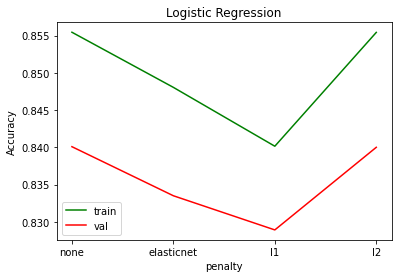

In [17]:
train_acc = []
test_acc = []
for penalty in ['none','elasticnet','l1','l2']:
    print("Logistic Regression (penalty={})".format(penalty))
    model = LogisticRegression(C=0.01,penalty=penalty,solver='saga',max_iter=20,l1_ratio=0.5)
    model.fit(X_tr,y_tr)
    train_acc.append(model.score(X_tr,y_tr))
    test_acc.append(model.score(X_val,y_val))
    
plt.plot(['none','elasticnet','l1','l2'],train_acc,label='train',c='g')
plt.plot(['none','elasticnet','l1','l2'],test_acc,label='val',c='r')
plt.xlabel("penalty")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Logistic Regression")

print(train_acc)
print(test_acc)

## Learning curve

In [18]:
from sklearn.model_selection import learning_curve

In [19]:
best_model = LogisticRegression(C=0.01,penalty='none',solver='saga',max_iter=20)
res = learning_curve(best_model,X_train,y_train,cv=5)

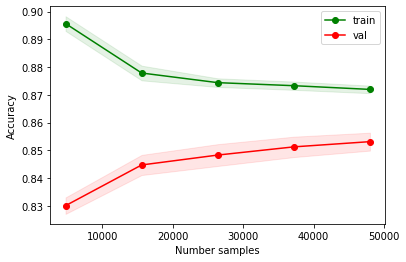

In [26]:
plt.fill_between(res[0],np.mean(res[1],axis=1)-np.std(res[1],axis=1),\
                 np.mean(res[1],axis=1)+np.std(res[1],axis=1),alpha=0.1,color='g')
plt.fill_between(res[0],np.mean(res[2],axis=1)-np.std(res[2],axis=1),\
                 np.mean(res[2],axis=1)+np.std(res[2],axis=1),alpha=0.1,color='r')

plt.plot(res[0],np.mean(res[1],axis=1),"o-",c='g',label='train')
plt.plot(res[0],np.mean(res[2],axis=1),"o-",c='r',label='val')
plt.xlabel("Number samples")
plt.ylabel("Accuracy")
plt.legend()